## Preprocess uncropped images

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from util import *

In [2]:
# define image folder and get list of images
img_path = "C:/D drive/2024_T7/CV proj/test_uncropped"
img_list = os.listdir(img_path)

### Resizing

img shape: (1080, 1920, 3)


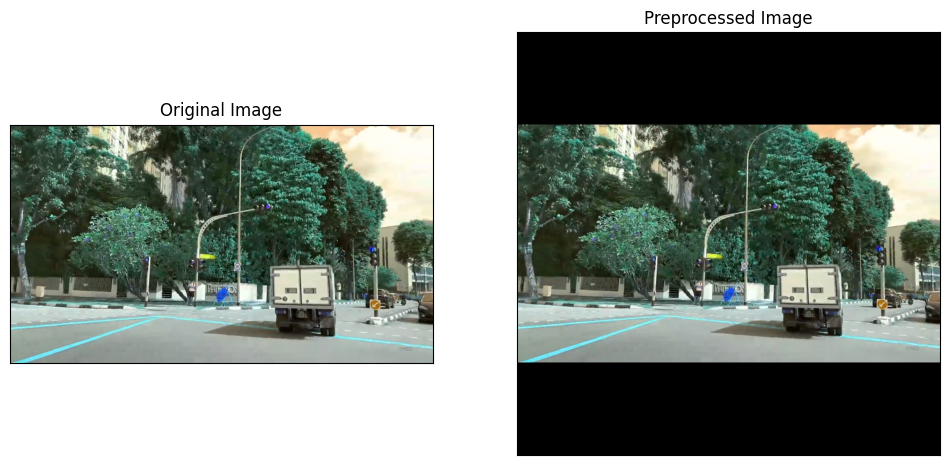

True

In [46]:
# get random image
rand_img = img_path+"/"+np.random.choice(img_list)
while not '.png' in rand_img:
    rand_img = img_path+"/"+np.random.choice(img_list)
img = cv2.imread(rand_img)
print('img shape:', img.shape)

# resize 
def resize_image(image, size=(1280,1280), keep_aspect_ratio=True):
    if keep_aspect_ratio:
        h,w,_ = image.shape
        resized_img = cv2.resize(image, (size[1], round(h/w*size[0])))
        rh,rw,_ = resized_img.shape
        border_size = (rw-rh)//2
        resized_img = cv2.copyMakeBorder(resized_img,border_size,border_size,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
    else: 
        resized_img = cv2.resize(image, size)
    return resized_img

resized_img_800 = resize_image(img, size=(800,800))

plot_imgs(img,resized_img_800)

# save img
cv2.imwrite('out_800.png', resized_img_800)
resized_img_1280 = resize_image(img, size=(1280,1280))
cv2.imwrite('out_1280.png', resized_img_1280)

### Sharpening

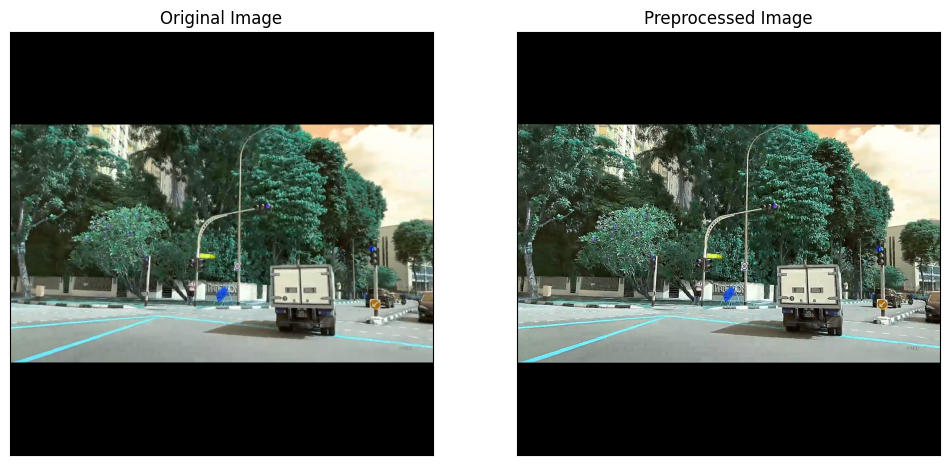

True

In [ ]:
# sharpen images
def sharpen_image(image, kernel=np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])):
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

kernels = {
    0: np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    1: np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),
}

sharpened_0 = sharpen_image(resized_img_1280, kernel=kernels[0])
sharpened_1 = sharpen_image(resized_img_1280, kernel=kernels[1])

plot_imgs(resized_img_1280, sharpened_0)
cv2.imwrite('out_1280_sharp0.png', sharpened_0)
cv2.imwrite('out_1280_sharp1.png', sharpened_1)

### Increase saturation

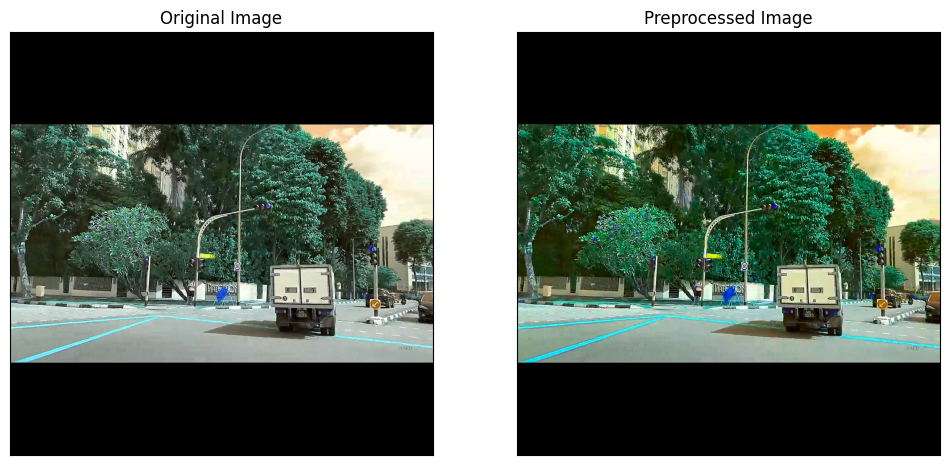

True

In [73]:
# increase saturation of images
def incr_saturation(img, sat_adj=1.1):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype("float32")
    (h,s,v) = cv2.split(img_hsv)
    # print('original hsv:',h,s,v)
    s = s*sat_adj
    s = np.clip(s,0,255)
    img_hsv = [h,s,v]
    img_hsv = cv2.merge([h,s,v])
    out = cv2.cvtColor(img_hsv.astype("uint8"), cv2.COLOR_HSV2BGR)
    return out

sat_0 = incr_saturation(sharpened_0, sat_adj=1.1)
sat_1 = incr_saturation(sharpened_0, sat_adj=2)

plot_imgs(sharpened_0, sat_1)
cv2.imwrite('out_1280_sat0.png', sat_0)
cv2.imwrite('out_1280_sat1.png', sat_1)

## Preprocess all

In [7]:
from preprocess import * 

def preprocess_img(img):
    out = resize_image(img, size=(800,800))
    out = sharpen_image(out)
    out = incr_saturation(out, sat_adj=2)
    return out

In [8]:
img_folder = "C:/D drive/2024_T7/CV proj/test_uncropped"
out_folder = "C:/D drive/2024_T7/CV proj/uncropped_PP"
dir_ls= os.listdir(img_folder)

for item_name in dir_ls:
    if '.png' in item_name:
        path = img_folder+"/"+item_name
        img = cv2.imread(path)
        pp_img = preprocess_img(img)
        out_path = out_folder+"/"+item_name
        cv2.imwrite(out_path, pp_img)
        print(f"Saved as {out_path}.")

Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/001.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/002.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/003.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/004.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/005.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/006.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/007.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/008.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/009.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/011.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/012.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/013.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/014.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/015.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/016.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/017.png.
Saved as C:/D drive/2024_T7/CV proj/uncropped_PP/018.png.
Saved as C:/D 